In [35]:
import numpy as np
from oct2py import octave
import scipy.io as sio
from ipywidgets import interact, interactive, widgets
from IPython.display import display
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('animation', html='html5')
%matplotlib notebook 


from bokeh.io import push_notebook, show, output_notebook
from bokeh.models.sources import ColumnDataSource
from bokeh.plotting import figure
from bokeh.models import HoverTool
output_notebook()


Loading BokehJS ...

In [34]:
octave.addpath("/home/jmmauricio/bin/psat_octave/psat");


In [36]:
octave.eval('cd')
octave.run('/home/jmmauricio/Documents/public/Dropbox/Clases/ATyDSE/matlab/k12p6/runp.m')
mat_contents = sio.loadmat('/home/jmmauricio/Documents/public/Dropbox/Clases/ATyDSE/matlab/k12p6/out.mat')

 
                        < P S A T >
          Copyright (C) 2002-2016 Federico Milano
                      Version 2.1.10
                        May 26, 2016
  
PSAT comes with ABSOLUTELY NO WARRANTY; type 'gnuwarranty'
for details. This is free software, and you are welcome to
redistribute it under certain conditions; type 'gnulicense'
for details.
  
Host:         Octave 3.8.2
Session:      31-May-2017 00:42:41
Usage:        Command Line
Path:         /home/jmmauricio/Documents/public/Dropbox/Clases/ATyDSE/matlab/k12p6
 
Load data from file...
   
Newton-Raphson Method for Power Flow Computation
Data file "/home/jmmauricio/Documents/public/Dropbox/Clases/ATyDSE/matlab/k12p6/d_kundur1_mdl"
Writing file "fm_call" ...
PF solver: Newton-Raphson method
Single slack bus model
Iteration = 1     Maximum Convergency Error = 0.048618
Iteration = 2     Maximum Convergency Error = 0.0030922
Iteration = 3     Maximum Convergency Error = 1.7363e-05
Iteration = 4     Maximum Convergency Error =

In [37]:
F_x = mat_contents['DAE']['Fx'][0][0].toarray()
F_y = mat_contents['DAE']['Fy'][0][0].toarray()
G_x = mat_contents['DAE']['Gx'][0][0].toarray()
G_y = mat_contents['DAE']['Gy'][0][0].toarray()

In [38]:
Syn = mat_contents['Syn'][0][0]

In [39]:
A = F_x - F_y @ np.linalg.inv(G_y) @ G_x

lam,Phi = np.linalg.eig(A);
lam2,Psi = np.linalg.eig(A);

omegas = lam.imag;
sigmas = lam.real;

freqs = omegas/(2*np.pi);
zetas = sigmas/np.sqrt(sigmas**2+omegas**2)


<IPython.core.display.Javascript object>


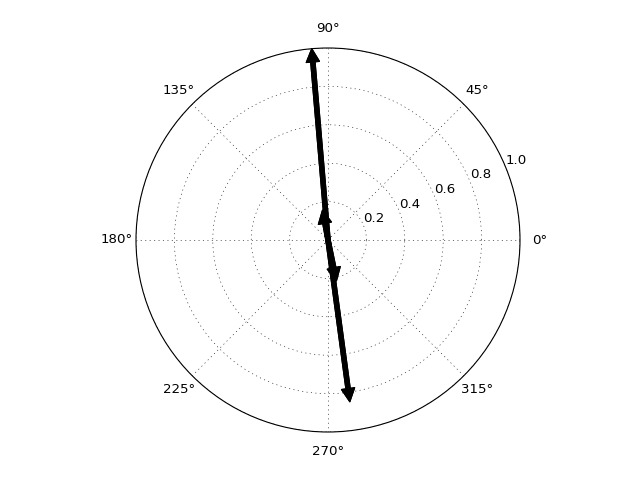

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
lam_stable = lam[lam.real<0.0]
lam_unstable = lam[lam.real>=0]
ax.plot(lam_stable.real,lam_stable.imag,'o',  color='green', ms=8) 
ax.plot(lam_unstable.real,lam_unstable.imag,'o',  color='red', ms=8) 
ax.grid(True)

In [41]:
p = figure(title="simple line example", plot_height=600, plot_width=600, y_range=(-10,10), 
           tools=['box_zoom,pan,save,hover,resize,reset,tap,wheel_zoom'])

source_st = ColumnDataSource({'x': lam_stable.real, 'y': lam_stable.imag, 
                           'num':range(len(lam_stable)),
                           'zetas':np.abs(zetas),
                           'freqs':freqs,    
                          })

source_ust = ColumnDataSource({'x': lam_unstable.real, 'y': lam_unstable.imag, 
                           'num':range(len(lam_stable)),
                           'zetas':np.abs(zetas),
                           'freqs':freqs,                          
                          })
stab  = p.circle('x','y', source=source_st, color="#5cb85c", size = 10)
ustab = p.circle('x','y', source=source_ust, color="#d9534f",size=8)

hover = p.select(dict(type=HoverTool))
hover.tooltips = [("id", "@num"), ("freqs", '@freqs Hz'),  ("damp", "@zetas{0.00%}"),("λ", "@x+j@y")]
hover.mode = 'mouse'
    
show(p, notebook_handle=True)




In [24]:
display(interactive)

<function ipywidgets.widgets.interaction.interactive>

<IPython.core.display.Javascript object>


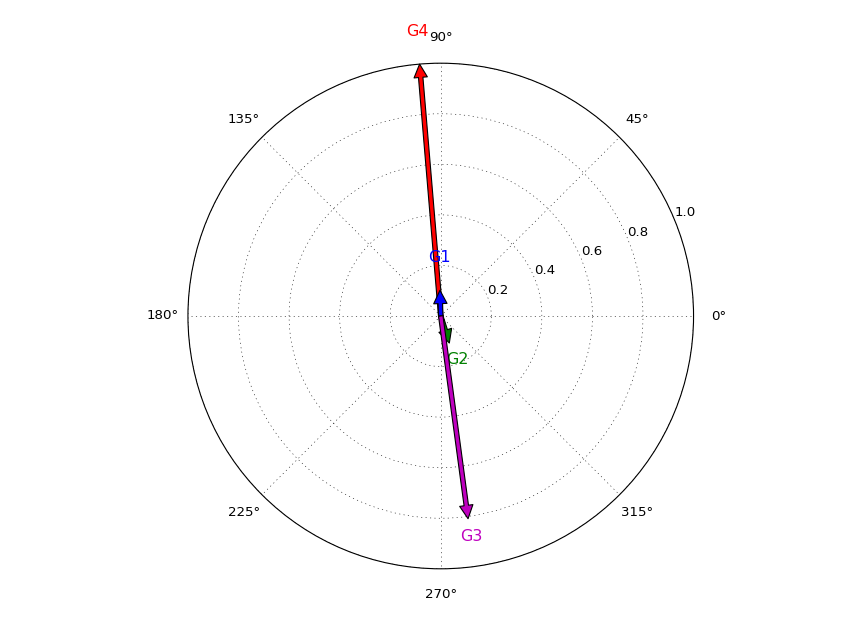

In [74]:
mode = 8
max_abs = np.max(np.abs(Phi[Syn['omega'][:,0].astype(np.int32)-1,mode]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
#ax.set_rlim(0.01)
syn_idxs = Syn['omega'][:,0].astype(np.int32)
colors = ['red','green','blue','m']
it = 0
for idx,vec,color in zip(syn_idxs,Phi[syn_idxs-1,mode],colors):
    xy=(np.angle(vec), np.abs(vec)/max_abs)
    ax.annotate('',
                xy=xy,  # theta, radius
                xycoords='data',
                xytext=(0.0, 0.0),    
                textcoords='data',
                arrowprops=dict(facecolor=color, shrink=0.0),
                horizontalalignment='right',
                verticalalignment='bottom',
                )
    ax.text(xy[0],xy[1]+0.1, 'G{:d}'.format(int(Syn['bus'][it][0])), ha="center", va="bottom", size="large",color=color)
    it += 1


In [47]:
syn_idxs

array([ 2,  8, 14, 20], dtype=int32)

In [33]:
Phi[13,Syn['omega'][:,0].astype(np.int32)]

array([ -1.37282730e-03+0.j        ,  -4.30796727e-05+0.00140613j,
         4.99231956e-04+0.j        ,   1.11283062e-04+0.j        ])

In [27]:
Syn['omega']

array([[  2.],
       [  8.],
       [ 14.],
       [ 20.]])

In [28]:
int(Syn['omega'][:,0])

TypeError: only length-1 arrays can be converted to Python scalars

In [29]:
Syn['omega'][:,0].astype(np.int32)

array([ 2,  8, 14, 20], dtype=int32)

In [68]:
Syn['bus'][0][0]

4.0